# Pre-processing Code

We pre-process the raw csv data into a more manageable format for later use

In [2]:
import numpy as np

In [3]:
drill_bit_setups = { # Cost Per Run, Cost Per Foot, Cost Per Hour
    'Buzz Drilldrin': (5000, 1.5, 0),
    'AstroBit': (3000, 1, 1500),
    'Apollo': (1000, 4, 2500),
    'ChallengDriller': (10000, 0, 0),
}

In [4]:
# Read all csv files

import csv

asteroids = []
for i in range(1, 21):
    measurements = []
    with open(f'Asteroids/Asteroid {i}.csv', newline='\n') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for i, row in enumerate(reader):
            if i == 0:
                headers = row
                continue
            measurements.append(row)
    asteroids.append((measurements))

In [5]:
# Process Data

import matplotlib.pyplot as plt

asteroid_data = []

for asteroid in asteroids:
    prev_id = None

    drill_bits = []
    depths = []
    penetration_rates = []
    hook_loads = []
    pressures = []
    weights = []
    times = []
    costs = [] # cost for each run

    cur_time = 0
    for measurement in asteroid:
        bit_depth, rate_of_penetration, hook_load, differential_pressure, weight_on_bit, drill_bit_id, drill_bit_name = measurement
        if bit_depth == '' or rate_of_penetration == '' or hook_load == '' or differential_pressure == '' or weight_on_bit == '':
            continue
        if float(bit_depth) < 0:
            continue
        if float(rate_of_penetration) <= 0:
            continue
        
        if len(depths) > 0:
            delta_depth = float(bit_depth) - float(depths[-1][-1])
            if delta_depth < 0:
                continue
            delta_time = delta_depth / float(rate_of_penetration) # hours
            cur_time += delta_time

        if drill_bit_id != prev_id:
            drill_bits.append(f'{drill_bit_id} ({drill_bit_name})')

            cur_time += float(bit_depth) * 2 / 100.0 * (30 * 1/60.0 * 1/60.0)

            if len(depths) > 0:
                distance = depths[-1][-1] - depths[-1][0]
                elapsed_time = times[-1][-1] - times[-1][0]

                cost_per_run, cost_per_foot, cost_per_hour = drill_bit_setups[drill_bit_name]
                costs.append(cost_per_run + distance * cost_per_foot + elapsed_time * cost_per_hour)

            depths.append([])
            penetration_rates.append([])
            hook_loads.append([])
            pressures.append([])
            weights.append([])
            times.append([])

        depths[-1].append(float(bit_depth))

        penetration_rates[-1].append(float(rate_of_penetration))

        hook_loads[-1].append(float(hook_load))

        pressures[-1].append(float(differential_pressure))

        weights[-1].append(float(weight_on_bit))

        times[-1].append(cur_time)

        prev_id = drill_bit_id

    if len(depths) > 0:
        distance = depths[-1][-1] - depths[-1][0]
        elapsed_time = times[-1][-1] - times[-1][0]

        cost_per_run, cost_per_foot, cost_per_hour = drill_bit_setups[drill_bit_name]
        costs.append(cost_per_run + distance * cost_per_foot + elapsed_time * cost_per_hour)

    asteroid_data.append((drill_bits, depths, penetration_rates, hook_loads, pressures, weights, times, costs))

# Efficiency Analysis

We need to analyze the efficiency of mining different asteroids

In [6]:
# Further process data into two statistics
# A high depth per hour is efficient in time
# A low cost per foot is efficient in resources used

depths_per_hour = []
costs_per_foot = []

for i, data in enumerate(asteroid_data):
    drill_bits, depths, penetration_rates, hook_loads, pressures, weights, times, costs = data

    total_time = times[-1][-1]
    total_depth = depths[-1][-1]
    total_cost = sum(costs)

    depths_per_hour.append((i, total_depth / total_time))
    costs_per_foot.append((i, total_cost / total_depth))

In [7]:
# Display the best asteroids according to these two statistics

depths_per_hour = sorted(depths_per_hour, key=lambda x: -x[1])
costs_per_foot = sorted(costs_per_foot, key=lambda x: x[1])

print('Best Asteroids in terms of feet drilled per hour:')
for asteroid_index, depth_per_hour in depths_per_hour[0:5]:
    print(f'Asteroid {asteroid_index + 1}: {depth_per_hour} ft/hr')

print('\nBest Asteroids in terms of cost per foot drilled:')
for asteroid_index, cost_per_foot in costs_per_foot[0:5]:
    print(f'Asteroid {asteroid_index + 1}: ${cost_per_foot} per ft')

Best Asteroids in terms of feet drilled per hour:
Asteroid 9: 200.2366639537047 ft/hr
Asteroid 4: 186.79853422162563 ft/hr
Asteroid 15: 182.524472615154 ft/hr
Asteroid 18: 172.55834520107516 ft/hr
Asteroid 11: 159.2854231918166 ft/hr

Best Asteroids in terms of cost per foot drilled:
Asteroid 7: $1.1187872346376528 per ft
Asteroid 16: $1.1259524149990372 per ft
Asteroid 8: $1.742025667571537 per ft
Asteroid 15: $3.098765682656827 per ft
Asteroid 6: $3.12164954979294 per ft


# Example
Let's explore Asteroid 15 since it appeared in the top 5 of both statistics

In [167]:
drill_bits, depths, penetration_rates, hook_loads, pressures, weights, times, costs = asteroid_data[15 - 1]

['1 (AstroBit)', '2 (Apollo)', '3 (ChallengDriller)', '4 (ChallengDriller)', '5 (Buzz Drilldrin)']


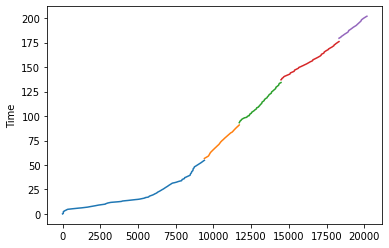

In [8]:
# Plot the progression of time as measurement goes on

print(drill_bits)

runs = []

cur = 0
for time_run in times:
    plt.plot(np.arange(cur, cur + len(time_run)), time_run)
    cur = cur + len(time_run)

plt.ylabel('Time')
plt.show()

Changes in color indicate a change of tip. The discontinuities in the graph above show the time taken to replace the tip. The identifiers of the different tips are shown above the graph.

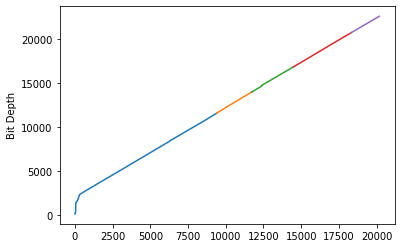

In [9]:
# Plot the bit depth as measurement goes on

runs = []

cur = 0
for depth_run in depths:
    plt.plot(np.arange(cur, cur + len(depth_run)), depth_run)
    cur = cur + len(depth_run)

plt.ylabel('Bit Depth')
plt.show()

This graph is nearly linear, implying measurements are taken at a consistent distance interval.

We'll analyze a few more features to see some beneficial trends in the values of those features.

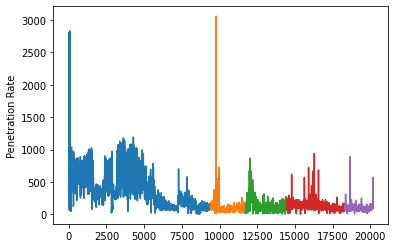

In [10]:
# Plot the penetration rate as measurement progresses

runs = []

cur = 0
for penetration_run in penetration_rates:
    plt.plot(np.arange(cur, cur + len(penetration_run)), penetration_run)
    cur = cur + len(penetration_run)

plt.ylabel('Penetration Rate')
plt.show()

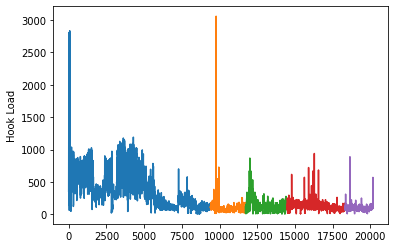

In [11]:
# Plot the hook load as measurement goes on

runs = []

cur = 0
for hook_load_run in penetration_rates:
    plt.plot(np.arange(cur, cur + len(hook_load_run)), hook_load_run)
    cur = cur + len(hook_load_run)

plt.ylabel('Hook Load')
plt.show()

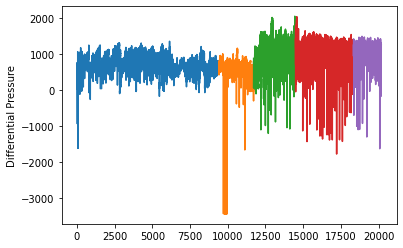

In [12]:
# Plot the differential pressure as measurement goes on

runs = []

cur = 0
for pressure_run in pressures:
    plt.plot(np.arange(cur, cur + len(pressure_run)), pressure_run)
    cur = cur + len(pressure_run)

plt.ylabel('Differential Pressure')
plt.show()

We can analyze these many parameters to determine how best to mine another asteroid in the future while maintaining efficiency. Further analysis would be the next steps of this project.

Text(0, 0.5, 'Cost')

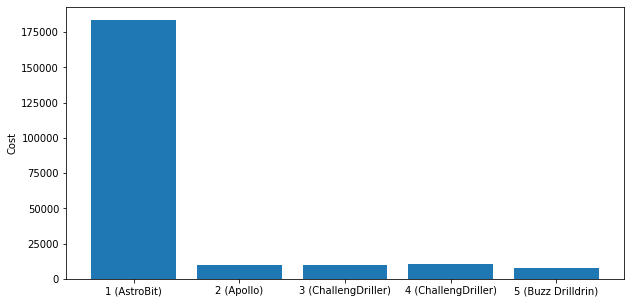

In [13]:
fig = plt.figure(figsize=(10, 5))

plt.bar(drill_bits, costs)
plt.ylabel('Cost')

The cost incurred by each drill bit over its run is shown above.

We can analyze other asteroids to find trends in setting the values of different parameters in order to maximize efficiency.

# Further Analysis and Prediction

We looked into a few parameters to find correlations to predict good values for future mining endeavors.

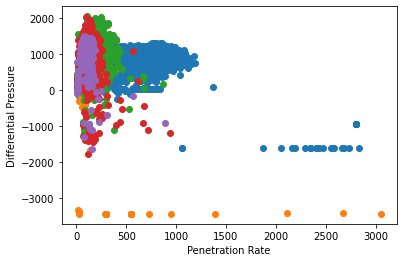

In [16]:
# Plot the penetration rate vs differential pressure

runs = []

cur = 0
for i, penetration_run in enumerate(penetration_rates):
    pressure_run = pressures[i]
    plt.scatter(penetration_run, pressure_run)
    cur = cur + len(pressure_run)

plt.xlabel('Penetration Rate')
plt.ylabel('Differential Pressure')
plt.show()

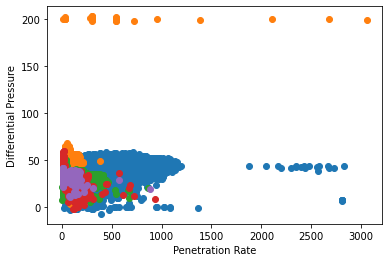

In [18]:
# Plot the penetration rate vs weight on bit

runs = []

cur = 0
for i, penetration_run in enumerate(penetration_rates):
    weight_run = weights[i]
    plt.scatter(penetration_run, weight_run)
    cur = cur + len(pressure_run)

plt.xlabel('Penetration Rate')
plt.ylabel('Differential Pressure')
plt.show()